
# <center><u>The Battle of Neighborhood - Delhi Chapter</u></center>

<p style='text-align: right;'> <i>- By Debapriyo Dasgupta</i></p>

## Introduction

<p style='text-align: justify;'><b>Delhi</b>, the iconic post-colonial capital of India, is one of the most visited places in the country. People from all over the world visit Delhi to experience the surging blend of crumbling history and gleaming modernity. This city offers a perfect mix of different culture, historical artifacts, glamorous night-life and last but not the least mouth-watering food.</p>

<p style='text-align: justify;'>Talking about food to be specific, nowadays in Delhi, there are multiple cuisines available scattered in different areas of Delhi. Starting from famous Lucknowi biriyani and kebabs to tibetian thukpa, hot and spicy chole batore to cold and tasty kulfi faluda, theres a lot of diversity.</p>

<p style='text-align: justify;'>Amidst such huge diversified availability of multiple cuisines, I feel there are still some cuisines missing in some areas of the city which is resisting Delhi to become the undisputed food capital of the country.</p>

## Business purpose

<p style='text-align: justify;'>Although different cuisines are available in different areas of Delhi, some of the cuisines are not well-distributed. For example, if Mr. Prakash who is staying in Anand Vihar (East Delhi), wants to have good bengali cuisine then he has to go to C.R. Park which is in South Delhi which is more or less 20KM.</p>
    
<p style='text-align: justify;'>My objective is to try to analyze each and every neighborhood of delhi, to see what are the available cuisines in each neighborhood, the list of food joints available in that area serving those cuisines, what kind of service is provided based on the user ratings . Then on the basis of this I will try to group or cluster the neighborhoods highlighting top cuisines. Also from there I might be able to identify the need of missing cuisines that can be introduced in the corresponding cluster so as to facilitate Mr. Prakash</p>


Let me dot down the business purpose of this report explicitly:
- Foodies can find their corresponding food heaven cluster with the result of this report
- Since we are going to find the missing cuisines, entrepreneurs can avail their business scope in and around the area

Just a note, I might be a little biased to see the scope of bengali cuisine here and there, but just to share that is only for the interest of Mr. Prakash.

## About the data

For the data to perform the necessary analysis, multiple sources needs to be used. For this we need to understand the sources per stages of data collection. Below is an explanation of the different data collection method used and description of the data sources and data model.

### 1. Locational data

Delhi has a total of 560 neighborhood distributed among districts. For the data collection pupose, I have downloaded data from data.gov.in, a digital India initiative. 
Url for the datasource https://data.gov.in/catalog/all-india-pincode-directory?filters%5Bfield_catalog_reference%5D=85840&format=json&offset=0&limit=6&sort%5Bcreated%5D=desc

Below are the available data

- __CircleName__ --> defines the circle name. In this case "Delhi Circle"
- __RegionName__ --> defines the region name
- __DivisionName__ --> defines the division name
- __OfficeName__ --> defines the area name
- __Pincode__ --> defines the postal code of the area
- __OfficeType__ --> defines type of office
- __Delivery__ --> defines whether postal delivery is available or not
- __District__ --> defines the district
- __StateName__ --> defines the state, in this case "Delhi"

Here is a snapshot of the raw data collected

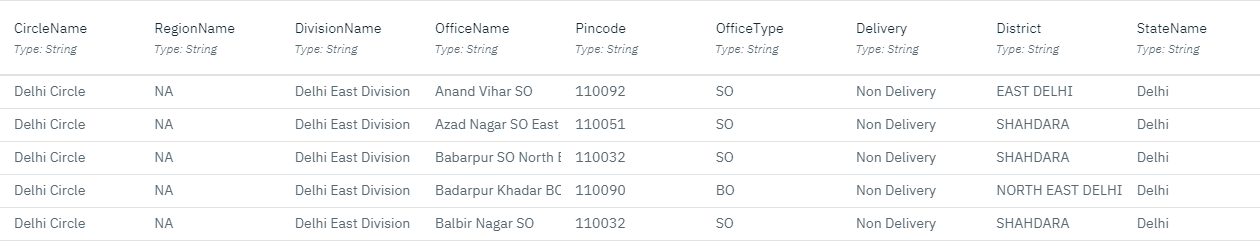

Once the data is collected and loaded in DataFrame, we have to do some cleaning and wranggling to get the necessary dataset. 
The required features we may identify from this is as below:
- __Pincode__ --> Same as the original field
- __District__ --> Same as the origial field
- __Neighborhood__ --> Transformed from _OfficeName_ after trimming the OfficeType, i.e., SO/BO/HO etc


The dataset should look something like below:
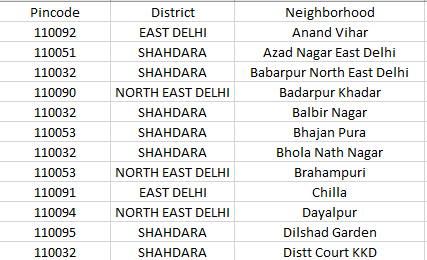

### 2. Collect the latitude and longitude

Once the data is sorted we need to fetch latitude and longitude of each area using the _geopy_ python library. Then our dataset should have the below columns:
- __Pincode__
- __District__
- __Neighborhood__
- __Latitude__
- __Longitude__

A sample of the updated feature dataset will be as below:
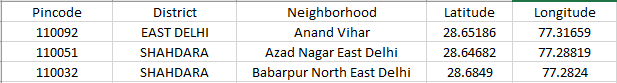

### 3. Traversing neighborhood

We will then on the basis of each neighborhood try to navigate using the data from different _FourSquare_ API call, and find what are the good eateries around, which category of cuisine does it offer, how the users rated have rated the food joint.

From the output of the API call we will fetch the features
- venueName
- venueCategory
- venueLatitude
- venueLongitude
- venueDistance

{'meta': {'code': 200, 'requestId': '5e3a24c0b9a389001b42bea5'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'East Delhi',
  'headerFullLocation': 'East Delhi, Delhi',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 28.656360004500005,
    'lng': 77.32170834751545},
   'sw': {'lat': 28.647359995499993, 'lng': 77.31147165248456}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d820f8021c0b60c709ae56f',
       'name': "Vinny's Rest-O-Bar",
       'location': {'address': 'B-10, Atta Market, Sector 18',
        'lat': 28.649099361517656,
        'lng': 77.31740207608473,
        'labeledLatLngs': [{'label': 'display',
          'lat': 28.649099361517656,
          'lng': 77.31740207608473}],
        'distance': 317,
        'postalCode': '201301',
        'cc': 'IN',
        'city': 'Noida',
        'state': 'Uttar Pradesh',
        'country': 'India',
        'formattedAddress': ['B-10, Atta Market, Sector 18',
         'Noida 201301',
         'Uttar Pradesh',
         'India']},
       'categories': [{'id': '4bf58dd8d48988d116941735',
         'name': 'Bar',
         'pluralName': 'Bars',
         'shortName': 'Bar',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-4d820f8021c0b60c709ae56f-0'}]}]}}

In [5]:
# The code was removed by Watson Studio for sharing.

{'meta': {'code': 200, 'requestId': '5e3a24c0dd0f85001bf86b28'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'East Delhi',
  'headerFullLocation': 'East Delhi, Delhi',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 28.656360004500005,
    'lng': 77.32170834751545},
   'sw': {'lat': 28.647359995499993, 'lng': 77.31147165248456}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d820f8021c0b60c709ae56f',
       'name': "Vinny's Rest-O-Bar",
       'location': {'address': 'B-10, Atta Market, Sector 18',
        'lat': 28.649099361517656,
        'lng': 77.31740207608473,
        'labeledLatL

### 4. Visualizing the locations

We will use the folium package to visualize the locations on the map of Delhi and try to find clusters

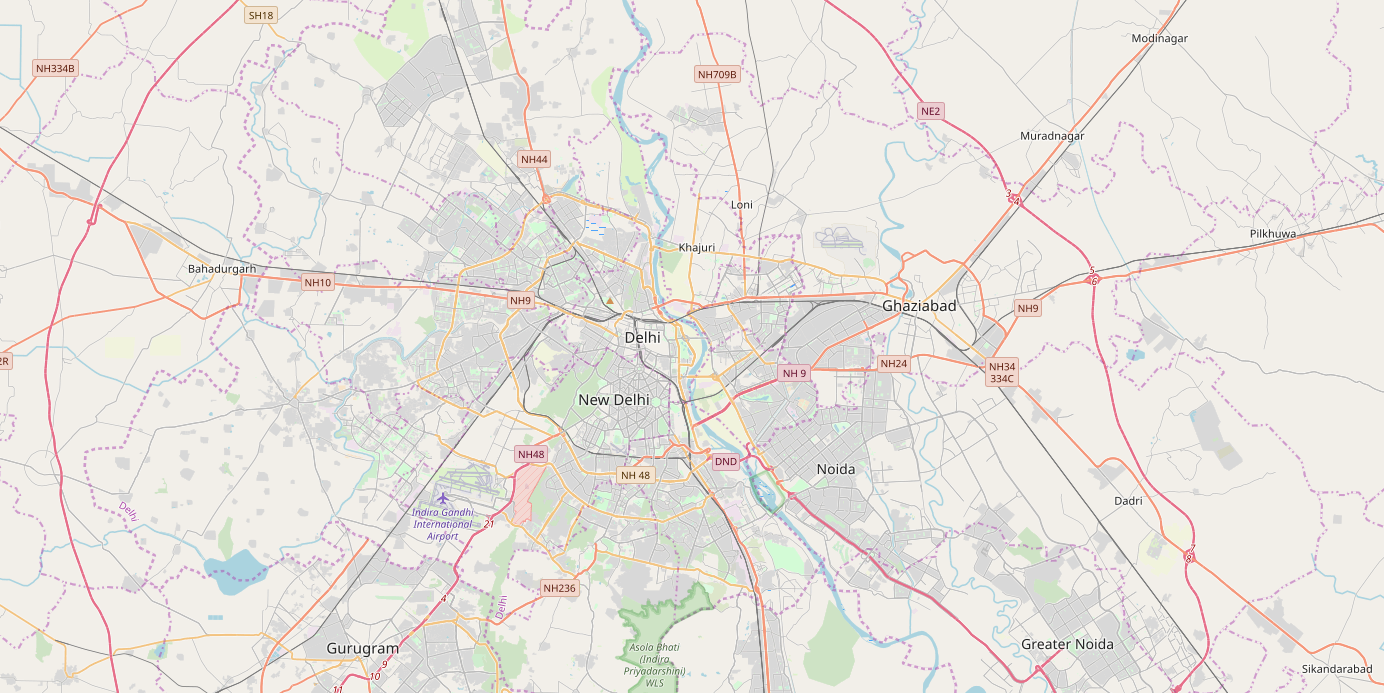

In [7]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.0.1               |             py_0         575 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

In [16]:
map_delhi = folium.Map(location =[28.65381, 77.22897], zoom_start=11)
map_delhi